# GitHub analysis

In [3]:
import pandas as pd
import numpy as np
import os
from datetime import datetime
from matplotlib import pyplot as plt

## Engagement numbers

In [4]:
stars_df = pd.read_csv("../data/analysis/stars.csv")
stars_df.head()

,Unnamed: 0,github_user_cleaned_url,date,user
0,0,JZhao12/CVML-Pose,NaN,NaN
1,1,CVML-UCLan/FCBFormer,2022-08-18 00:47:08,GitHub30
2,1,CVML-UCLan/FCBFormer,2022-09-02 00:39:35,zmw272415
3,1,CVML-UCLan/FCBFormer,2022-09-23 03:49:26,Earthnook
4,2,eprintsug/loginViaOrcid,NaN,NaN


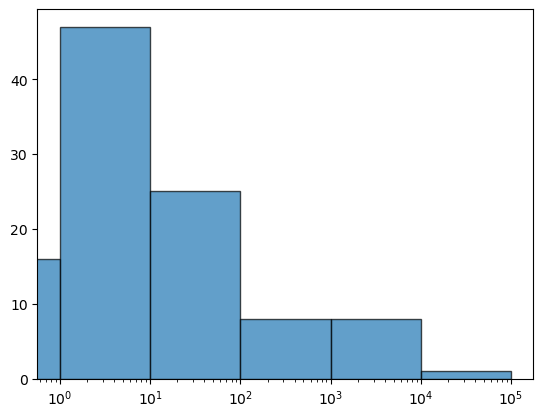

In [32]:
bins = np.hstack([0, 10**(np.arange(0,6))])
counts, bins, _ = plt.hist(stars_df.groupby("github_user_cleaned_url").count()["user"], bins=bins, ec="black", alpha=0.7)
plt.xscale('log')

In [33]:
print(counts)
print(bins)

[16. 47. 25.  8.  8.  1.]
[0.e+00 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04 1.e+05]


In [34]:
forks_df = pd.read_csv("../data/analysis/forks.csv")
forks_df.head()

,Unnamed: 0,github_user_cleaned_url,date,user
0,0,JZhao12/CVML-Pose,NaN,NaN
1,1,CVML-UCLan/FCBFormer,NaN,NaN
2,2,eprintsug/loginViaOrcid,NaN,NaN
3,3,eprintsug/orcidt2,2015-06-04 11:49:59,wfyson
4,4,alphapsa/PIPE,2021-03-10 08:49:05,bmorris3


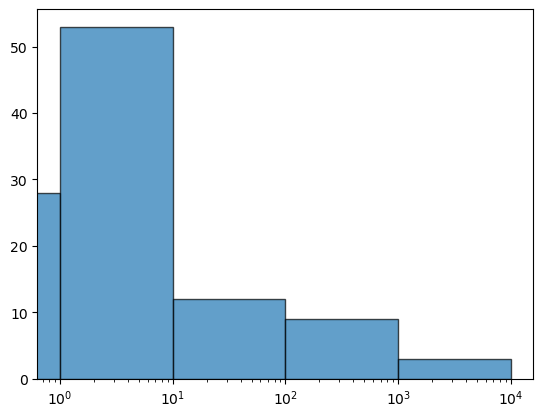

In [40]:
bins = np.hstack([0, 10**(np.arange(0,5))])
counts, bins, _ = plt.hist(forks_df.groupby("github_user_cleaned_url").count()["user"], bins = bins, ec="black", alpha=0.7)
plt.xscale('log')

In [60]:
fork_counts = forks_df.groupby("github_user_cleaned_url").count()
fork_counts.rename(columns={"user": "forks_no"}, inplace=True)
star_counts = stars_df.groupby("github_user_cleaned_url").count()
star_counts.rename(columns={"user": "stars_no"}, inplace=True)
engagement = pd.merge(left=fork_counts, right=star_counts, on="github_user_cleaned_url")
engagement.head()

,Unnamed: 0_x,date_x,forks_no,Unnamed: 0_y,date_y,stars_no
github_user_cleaned_url,,,,,,
52North/GEO-label-java,4,4,4,4,4,4
ADAC-UoN/PIMMS,1,1,1,1,0,0
AlexTS1980/COVID-Single-Shot-Model,1,0,0,3,3,3
AshwathyTR/IDN-Sum,1,1,1,1,1,1
BryanHunt/mongo-emf,7,7,7,38,38,38


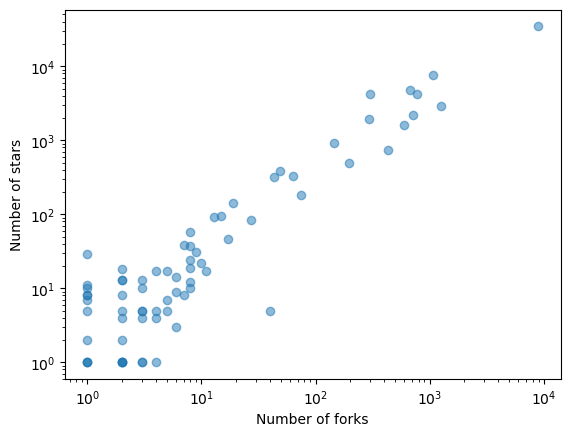

In [66]:
plt.scatter(engagement["forks_no"], engagement["stars_no"], alpha=0.5)
plt.xlabel("Number of forks")
plt.ylabel("Number of stars")
plt.xscale('log')
plt.yscale('log')

## Timelines

In [4]:
def plot_against_days_since_creation(df, column_name, label):
    """Plots number of markers set on all days since creation (total, one year, one month).

    Args:
        df (pd.DataFrame): input dataframe
        column_name (str): name of column with days since creation info
        label (str): what number we are looking at
    """
    counted = df.groupby(column_name).count()
    fig = plt.figure(figsize=(20, 4))
    plt.subplot(131)
    plt.bar(counted.index, counted.github_user_cleaned_url)
    plt.xlabel("days since repository creation")
    plt.ylabel(f"number of {label} on that day")
    plt.title("Complete timeline across all repositories")

    plt.subplot(132)
    plt.bar(counted.index[:365], counted.github_user_cleaned_url[:365])
    plt.xlabel("days since repository creation")
    plt.ylabel(f"number of {label} on that day")
    plt.title("First year")

    plt.subplot(133)
    plt.bar(counted.index[:31], counted.github_user_cleaned_url[:31])
    plt.xlabel("days since repository creation")
    plt.ylabel(f"number of {label} on that day")
    plt.title("First month")

    plt.show()

In [5]:
def plot_against_weeks_since_creation(df, column_name, label):
    """Plots number of markers set on all days since creation (total, one year, one month).

    Args:
        df (pd.DataFrame): input dataframe
        column_name (str): name of column with days since creation info
        label (str): what number we are looking at
    """
    df[f"weekly_{column_name}"] = df[column_name]//7
    counted = df.groupby(f"weekly_{column_name}").count()
    fig = plt.figure(figsize=(20, 4))
    plt.subplot(131)
    plt.bar(counted.index, counted.github_user_cleaned_url)
    plt.xlabel("weeks since repository creation")
    plt.ylabel(f"number of label on that day")
    plt.title("Complete timeline across all repositories")

    plt.subplot(132)
    plt.bar(counted.index[:52], counted.github_user_cleaned_url[:52])
    plt.xlabel("weeks since repository creation")
    plt.ylabel(f"number of label on that day")
    plt.title("First year")

    plt.subplot(133)
    plt.bar(counted.index[:4], counted.github_user_cleaned_url[:4])
    plt.xlabel("weeks since repository creation")
    plt.ylabel(f"number of label on that day")
    plt.title("First month")

    plt.show()

In [5]:
data_dir = "../data/analysis"

In [6]:
metadata = pd.read_csv(os.path.join(data_dir, "metadata.csv"), index_col=0)
metadata.created_at = pd.to_datetime(metadata.created_at, utc=True)
metadata.rename(columns={"created_at": "repo_created_at"}, inplace=True)
stars = pd.read_csv(os.path.join(data_dir, "stars.csv"), index_col=0)
stars.date = pd.to_datetime(stars.date, utc=True)

In [307]:
df = pd.merge(metadata, stars, on="github_user_cleaned_url")
df.dropna(subset=["date"], inplace=True)
df["starred_on_day_since_creation"] = (df.date - df.repo_created_at).dt.days

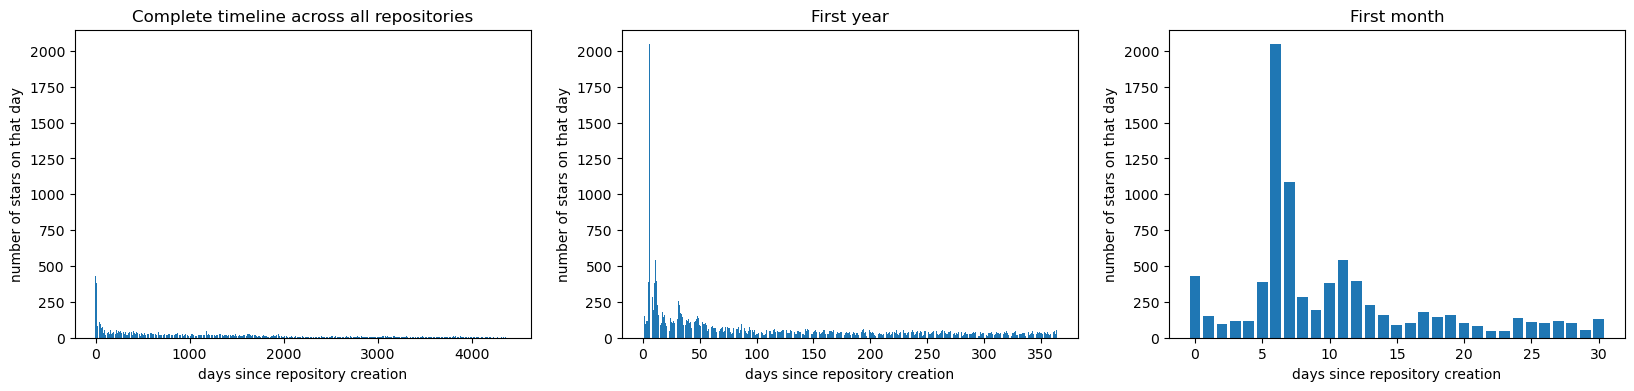

In [311]:
plot_against_days_since_creation(df, "starred_on_day_since_creation", "stars")

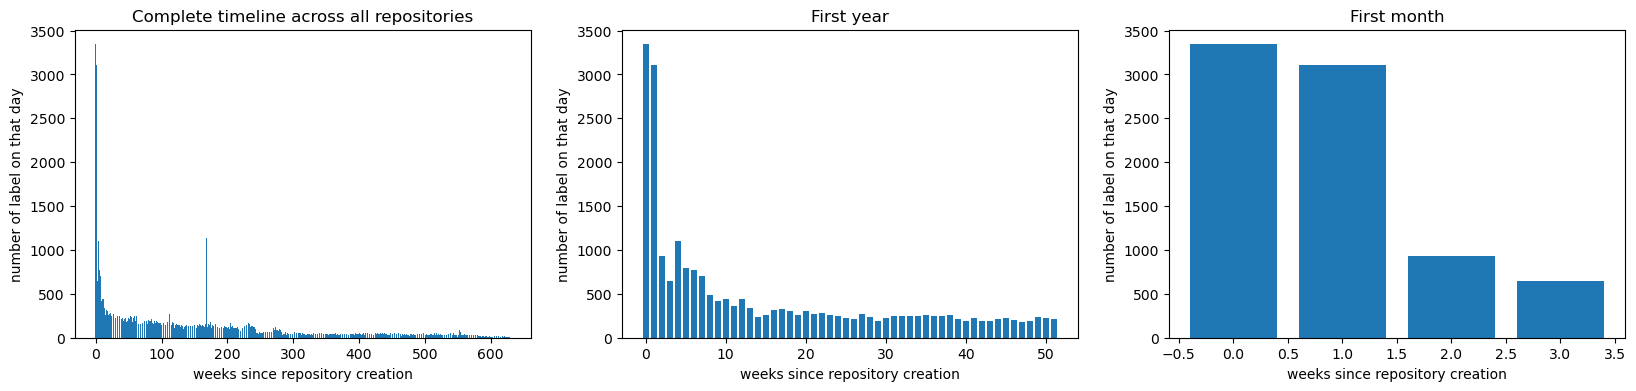

In [312]:
plot_against_weeks_since_creation(df, "starred_on_day_since_creation", "stars")

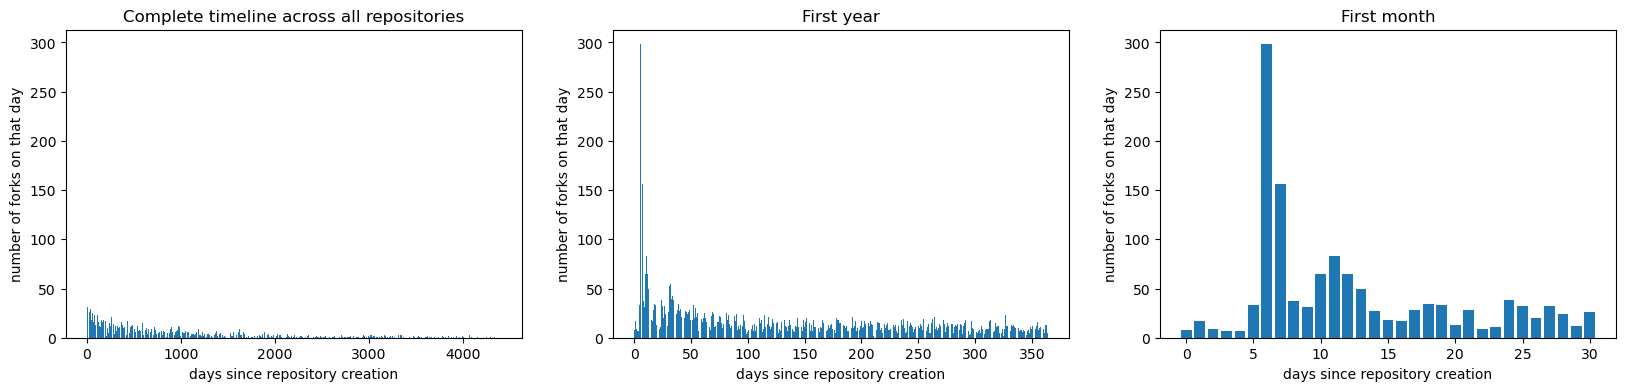

In [313]:
forks = pd.read_csv(os.path.join(data_dir, "forks.csv"), index_col=0)
forks.date = pd.to_datetime(forks.date, utc=True)
df = pd.merge(metadata, forks, on="github_user_cleaned_url")
df.dropna(subset=["date"], inplace=True)
df["forked_on_day_since_creation"] = (df.date - df.repo_created_at).dt.days
plot_against_days_since_creation(df, "forked_on_day_since_creation", "forks")

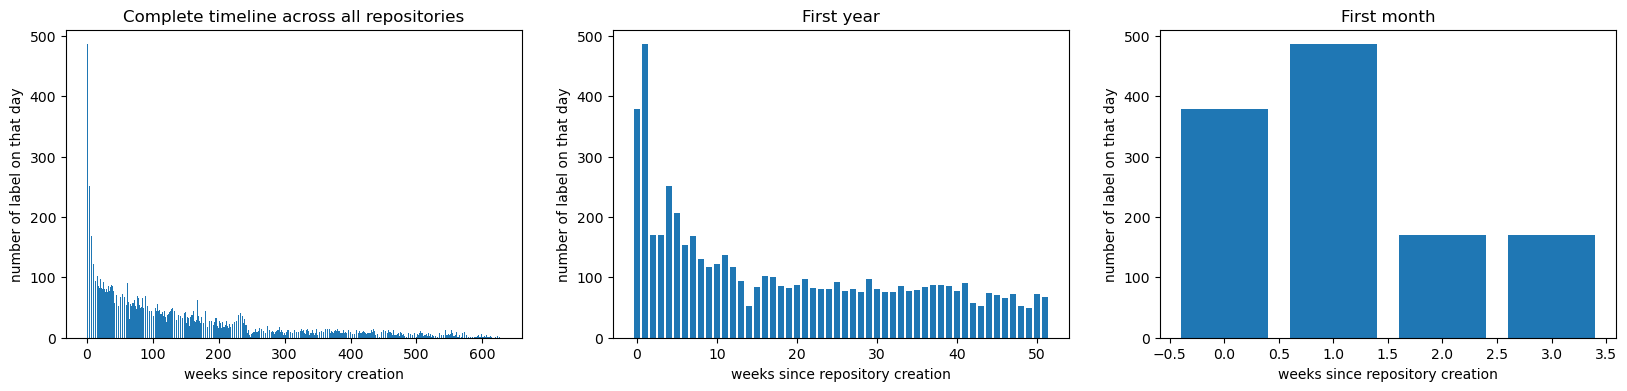

In [315]:
plot_against_weeks_since_creation(df, "forked_on_day_since_creation", "forks")

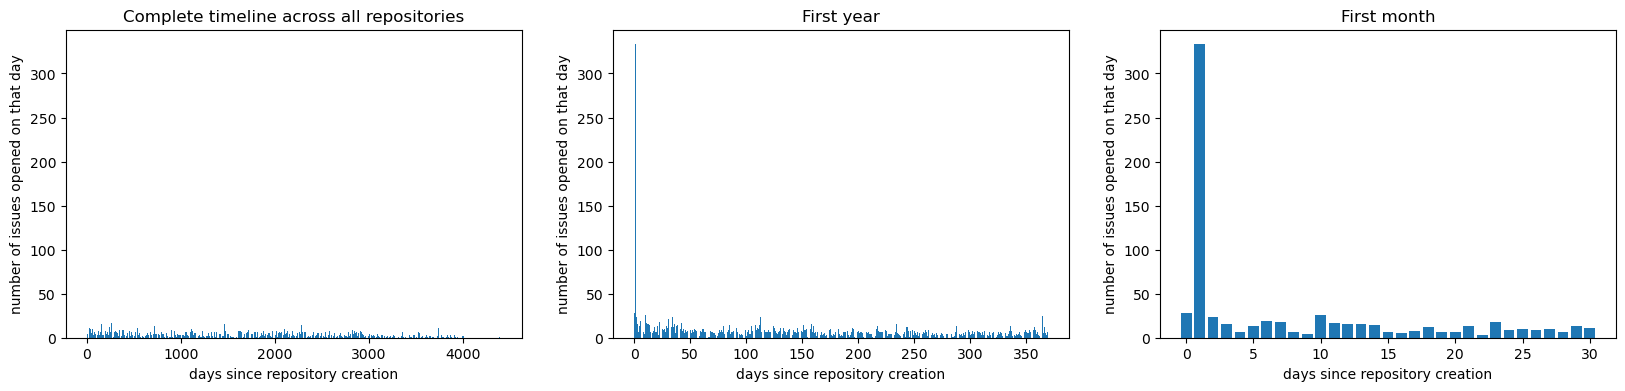

In [316]:
issues = pd.read_csv(os.path.join(data_dir, "issues.csv"), index_col=0)
issues.created_at = pd.to_datetime(issues.created_at, utc=True)
issues.closed_at = pd.to_datetime(issues.closed_at, utc=True)
df = pd.merge(metadata, issues, on="github_user_cleaned_url")
df.dropna(subset=["created_at"], inplace=True)
df["issue_opened_on_day_since_creation"] = (df.created_at - df.repo_created_at).dt.days
df = df[df.issue_opened_on_day_since_creation >= 0]
plot_against_days_since_creation(df, "issue_opened_on_day_since_creation", "issues opened")

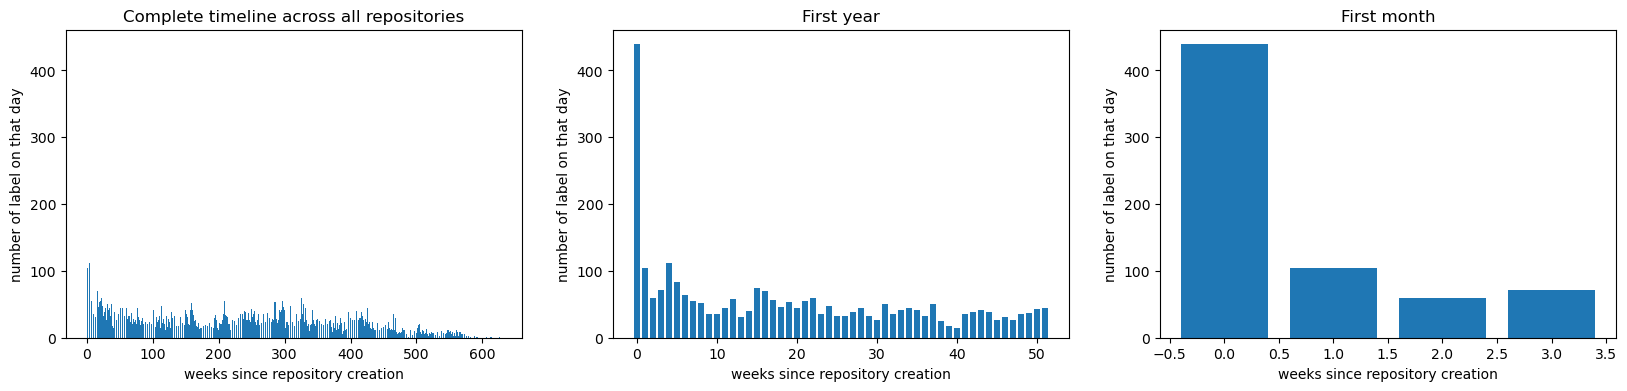

In [317]:
plot_against_weeks_since_creation(df, "issue_opened_on_day_since_creation", "issues opened")

## file presence

In [16]:
contents = pd.read_csv(os.path.join(data_dir, "contents.csv"), index_col=0)
contents.head()

,github_user_cleaned_url,license,readme_size,readme_path,readme_emojis,contributing_size,citation_added
0,JZhao12/CVML-Pose,apache-2.0,8539,README.md,0,0,NaN
1,CVML-UCLan/FCBFormer,NaN,541,README.md,0,0,NaN
2,eprintsug/loginViaOrcid,NaN,68,README.md,0,0,NaN
3,eprintsug/orcidt2,NaN,1157,README.md,0,0,NaN
4,alphapsa/PIPE,NaN,3182,README.rst,0,0,NaN


In [23]:
contents[pd.notna(contents.citation_added) == True]

,github_user_cleaned_url,license,readme_size,readme_path,readme_emojis,contributing_size,citation_added
36,esbmc/esbmc,other,12803,README.md,0,0,2022-12-06 14:46:10+00:00


In [24]:
contents[contents.readme_emojis > 0]

,github_user_cleaned_url,license,readme_size,readme_path,readme_emojis,contributing_size,citation_added
30,nilmtk/nilmtk,apache-2.0,5444,README.md,1,0,NaN
56,xiongbo010/QGCN,mit,5189,README.md,1,0,NaN
71,mozilla/TTS,mpl-2.0,14293,README.md,15,1942,NaN
82,bernuly/VCSimulinkTlbx,NaN,1612,README.md,1,0,NaN
84,kennethreitz/grequests,bsd-2-clause,4078,README.rst,3,0,NaN
98,ieee8023/covid-chestxray-dataset,NaN,10616,README.md,2,0,NaN


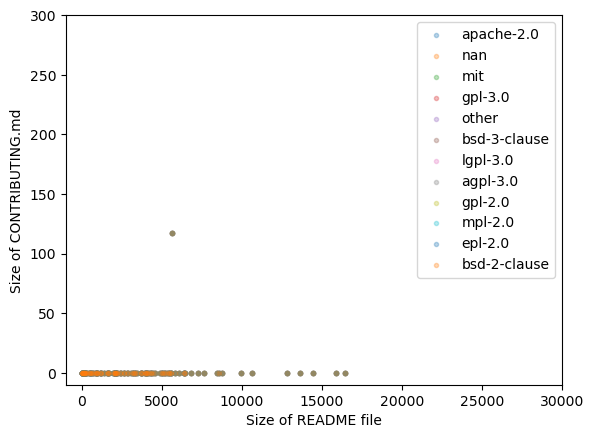

In [41]:
for l in contents.license.unique():
    tmp = contents[contents.license == l]
    plt.scatter(contents.readme_size, contents.contributing_size, alpha=0.3, marker='.', label=l)
plt.xlabel("Size of README file")
plt.ylabel("Size of CONTRIBUTING.md")
plt.xlim(-1000, 30000)
plt.ylim(-10, 300)
plt.legend()
plt.show()

<Axes: >

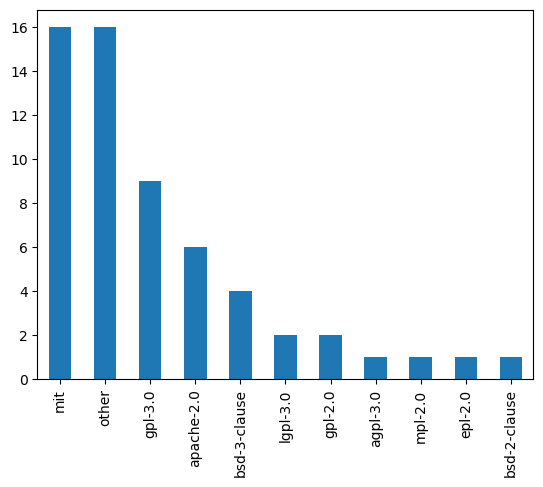

In [42]:
contents.license.value_counts().plot(kind='bar')

<Axes: xlabel='license', ylabel='readme_size'>

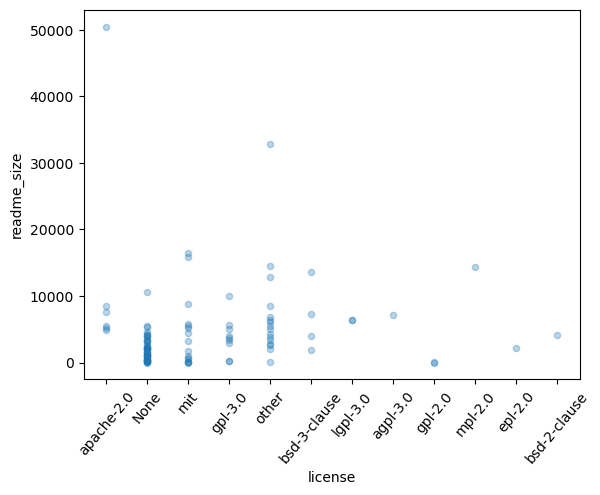

In [74]:
contents.license = contents.license.fillna('None')
contents.plot(x="license", y="readme_size", kind="scatter", alpha=0.3, rot=50)

## README headlines

In [4]:
readme_df = pd.read_csv(os.path.join(data_dir, "readme_history.csv"), index_col=0)
readme_df.head()

NameError: name 'data_dir' is not defined

In [94]:
readme_df[readme_df.added_headings.str.contains("Neo4J 2.0.1", na=False)]

,github_user_cleaned_url,readme_path,author_date,added_headings,deleted_headings,added_cites
71,mondo-project/mondo-hawk,README.md,2015-07-01 14:53:20+01:00,['Clone this Git repository on your Eclipse in...,[],[]


In [164]:
import re
import ast

pattern = "\[(.+?)\]\(.+?\)"
text = 'COVID-19 image data collection ([🎬 video about the project](https://www.youtube.com/watch?v=ineWmqfelEQ))'
re.sub(pattern, r'\1', text, count=0)

'COVID-19 image data collection (🎬 video about the project)'

In [218]:
import string
import re

def clean_heading(h):
    to_remove = string.digits + string.whitespace + ".:"
    h = h.lstrip(to_remove)
    pattern = "\[(.+?)\]\(.+?\)"
    h = re.sub(pattern, r'\1', h, count=0)
    h = h.replace(string.punctuation, "")
    h = h.strip(string.punctuation)
    h = h.lower()
    return h
    

In [219]:
import ast

headings = []
for l in readme_df.added_headings.dropna():
    headings += ast.literal_eval(l)
headings = [clean_heading(h) for h in headings]

### word cloud

In [232]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
stopwords = STOPWORDS
custom = set(["trades", "glosat", "glosat_table_dataset", "nilmtk", "bert", "lemon", "cascadetabnet"])
stopwords = stopwords.union(custom)

In [248]:
wordcloud = WordCloud(
    collocation_threshold=15,
    stopwords=stopwords,
    scale=10,
    background_color="white",
    random_state=42
    ).generate(" ".join(headings))

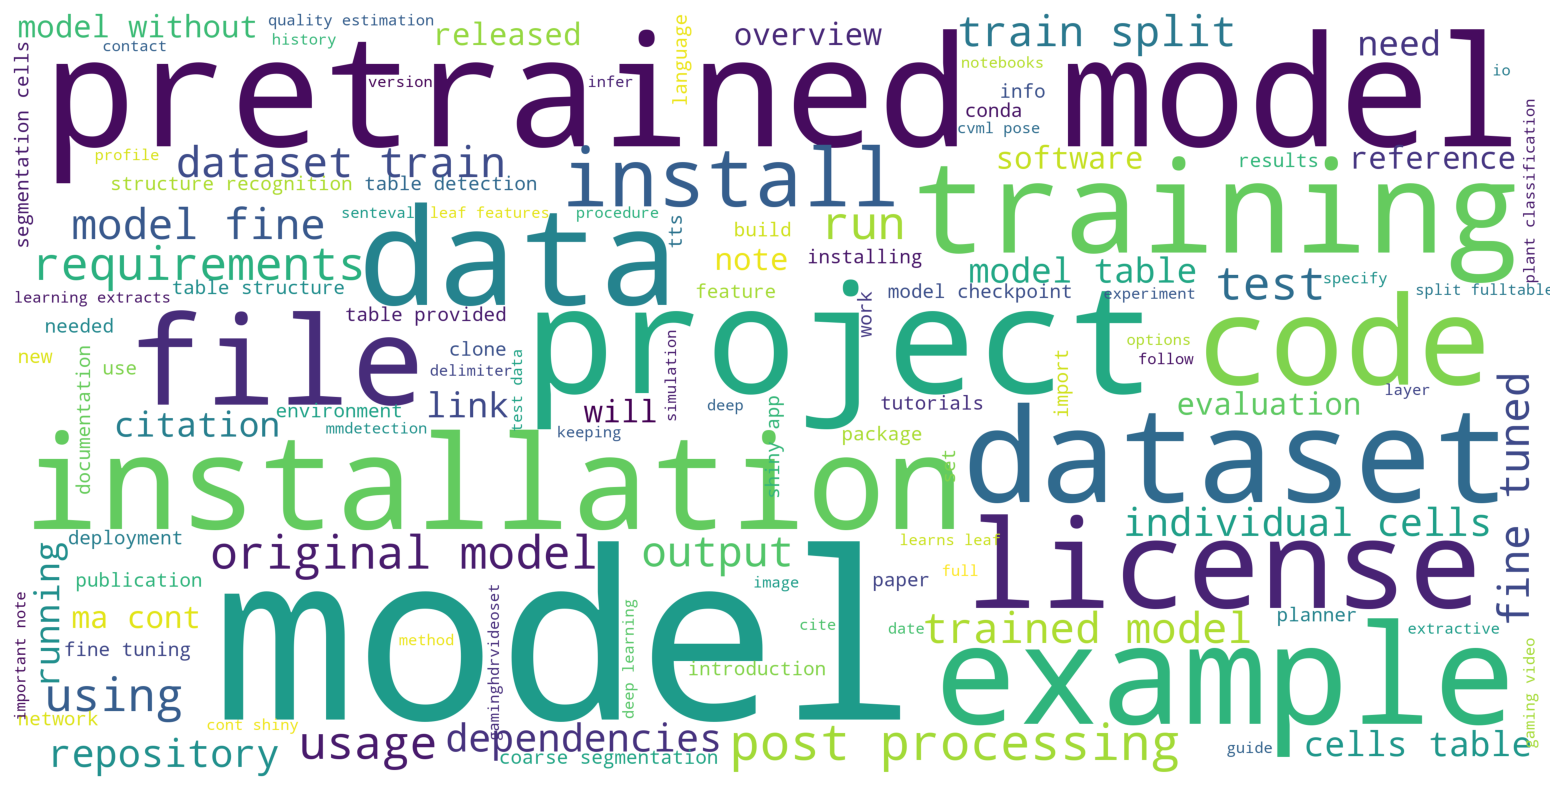

In [249]:
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### timelines

In [271]:
def analyse_headings(df):
    interesting_words = {
        "ownership": ["license", "example", "reference", "citation", "cited", "publication", "paper"],
        "usage": ["requirements", "using", "example", "usage", "run", "install", "installing", "installation", "tutorial", "tutorials", "build", "guide", "documentation"]
    }
    df["ownership_addition"] = df.added_headings.str.contains("|".join(interesting_words["ownership"]))
    df["usage_addition"] = df.added_headings.str.contains("|".join(interesting_words["usage"]))
    return df

In [272]:
readme_df.author_date = pd.to_datetime(readme_df.author_date, utc=True)
df = pd.merge(metadata, readme_df, on="github_user_cleaned_url")
df.dropna(subset=["author_date"], inplace=True)
df["authored_on_day_since_creation"] = (df.author_date - df.repo_created_at).dt.days

In [273]:
df = analyse_headings(df)

In [274]:
df[df["ownership_addition"] | df["usage_addition"]].head()

,github_user_cleaned_url,archived,repo_created_at,has_wiki,has_pages,readme_path,author_date,added_headings,deleted_headings,added_cites,authored_on_day_since_creation,ownership_addition,usage_addition
14,jlillo/tpfplotter,False,2020-02-02 21:31:02+00:00,True,False,README.md,2020-02-02 21:30:55+00:00,"['Purpose', 'Installation & Requirenments', 'U...",[],[],-1,False,True
24,survival-lumc/ValidationCompRisks,False,2021-02-17 09:12:11+00:00,True,False,README.md,2021-03-04 13:13:53+00:00,['External validation of the performance of co...,[],[],15,False,True
26,survival-lumc/ValidationCompRisks,False,2021-02-17 09:12:11+00:00,True,False,README.md,2021-11-02 07:27:06+00:00,['Validation of prediction models in presence ...,['External validation of the performance of co...,[],257,False,True
27,lucaborsato/trades,False,2014-07-10 12:23:27+00:00,True,False,README.md,2016-01-08 18:37:41+00:00,"['TRADES', 'TRADES user guide', 'Introduction'...",[],[],547,False,True
46,lucaborsato/trades,False,2014-07-10 12:23:27+00:00,True,False,README.md,2020-01-17 12:22:08+00:00,"['Introduction {#intro}', 'Install and Compile...","['Introduction', 'Install and Compile', 'How t...",[],2016,False,True


## example: jlillo/tpfplotter

In [20]:
def load_data(data_dir, filename, repo, to_datetime=None):
    df = pd.read_csv(os.path.join(data_dir, filename), index_col=0)
    df = df[df["github_user_cleaned_url"] == repo]
    if type(to_datetime) == list:
        for dt in to_datetime:
            df[dt] = pd.to_datetime(df[dt])
    elif type(to_datetime) == str:
        df[to_datetime] = pd.to_datetime(df[to_datetime])
    return df

In [21]:
data_dir = "../data/analysis"
repo = "jlillo/tpfplotter"
contents = load_data(data_dir, "contents.csv", repo, "citation_added")
cntributions = load_data(data_dir, "contributions.csv", repo)  # "week_co"
forks = load_data(data_dir, "forks.csv", repo, "date")
issues = load_data(data_dir, "issues.csv", repo, ["created_at", "closed_at"])
metadata = load_data(data_dir, "metadata.csv", repo, "created_at")
readme_history = load_data(data_dir, "readme_history.csv", repo, "author_date")
stars = load_data(data_dir, "stars.csv", repo, "date")

In [23]:
issues

,github_user_cleaned_url,state,created_at,user,closed_at,closed_by
6,jlillo/tpfplotter,open,2022-10-16 15:12:23,3fon3fonov,NaT,NaN
6,jlillo/tpfplotter,closed,2022-04-09 16:43:57,DreamOfStars,2023-06-23 12:36:16,jlillo
6,jlillo/tpfplotter,closed,2021-09-07 16:22:00,martindevora,2022-03-04 09:13:37,jlillo
6,jlillo/tpfplotter,closed,2021-03-22 23:03:04,JenniferBurt,2021-03-25 05:26:34,JenniferBurt
6,jlillo/tpfplotter,closed,2021-02-26 10:10:47,franpoz,2021-03-01 10:02:45,jlillo
6,jlillo/tpfplotter,closed,2020-11-04 15:42:29,angelicaps,2020-11-05 11:00:32,jlillo
6,jlillo/tpfplotter,closed,2020-10-16 15:16:04,elnjensen,2020-10-19 05:54:54,jlillo
6,jlillo/tpfplotter,closed,2020-05-12 05:29:13,jlillo,2020-05-12 05:32:27,jlillo
6,jlillo/tpfplotter,closed,2020-05-11 21:33:20,nespinoza,2020-05-12 04:43:11,jlillo
6,jlillo/tpfplotter,closed,2020-05-11 21:28:18,nespinoza,2020-05-12 04:41:29,jlillo


In [24]:
len(issues)

11

In [39]:
first = issues.groupby(["user", "github_user_cleaned_url"])[["created_at", "closed_at"]].min()
last = issues.groupby(["user", "github_user_cleaned_url"])[["created_at", "closed_at"]].max()

In [40]:
issue_dates = pd.merge(first, last, on=["user", "github_user_cleaned_url"], suffixes=["_first", "_last"])

In [116]:
issue_dates

,,created_at_first,closed_at_first,created_at_last,closed_at_last
user,github_user_cleaned_url,,,,
3fon3fonov,jlillo/tpfplotter,2020-02-24,2020-04-20,2022-10-10,2020-04-20
DreamOfStars,jlillo/tpfplotter,2022-04-04,2023-06-19,2022-04-04,2023-06-19
JenniferBurt,jlillo/tpfplotter,2021-03-15,2021-03-22,2021-03-15,2021-03-22
angelicaps,jlillo/tpfplotter,2020-11-02,2020-11-02,2020-11-02,2020-11-02
elnjensen,jlillo/tpfplotter,2020-10-12,2020-10-12,2020-10-12,2020-10-12
franpoz,jlillo/tpfplotter,2021-02-22,2021-02-22,2021-02-22,2021-02-22
jlillo,jlillo/tpfplotter,2020-05-11,2020-05-11,2020-05-11,2020-05-11
martindevora,jlillo/tpfplotter,2021-09-06,2022-02-28,2021-09-06,2022-02-28
nespinoza,jlillo/tpfplotter,2020-05-04,2020-05-11,2020-05-04,2020-05-11


In [89]:
offset = pd.DateOffset(weeks=1, weekday=0, normalize=True)
start = metadata.created_at.iloc[0] - offset

In [124]:
x_data = pd.Series(pd.date_range(start, datetime.today(), freq='W-MON'), name="week")

In [92]:
for col in ["created_at_first", "closed_at_first", "created_at_last", "closed_at_last"]:
    issue_dates[col] = issue_dates[col] - offset

/tmp/ipykernel_8999/2889629140.py:2: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex.
  issue_dates[col] = issue_dates[col] - offset


In [117]:
issue_dates.reset_index()

,user,github_user_cleaned_url,created_at_first,closed_at_first,created_at_last,closed_at_last
0,3fon3fonov,jlillo/tpfplotter,2020-02-24,2020-04-20,2022-10-10,2020-04-20
1,DreamOfStars,jlillo/tpfplotter,2022-04-04,2023-06-19,2022-04-04,2023-06-19
2,JenniferBurt,jlillo/tpfplotter,2021-03-15,2021-03-22,2021-03-15,2021-03-22
3,angelicaps,jlillo/tpfplotter,2020-11-02,2020-11-02,2020-11-02,2020-11-02
4,elnjensen,jlillo/tpfplotter,2020-10-12,2020-10-12,2020-10-12,2020-10-12
5,franpoz,jlillo/tpfplotter,2021-02-22,2021-02-22,2021-02-22,2021-02-22
6,jlillo,jlillo/tpfplotter,2020-05-11,2020-05-11,2020-05-11,2020-05-11
7,martindevora,jlillo/tpfplotter,2021-09-06,2022-02-28,2021-09-06,2022-02-28
8,nespinoza,jlillo/tpfplotter,2020-05-04,2020-05-11,2020-05-04,2020-05-11


In [164]:
df = pd.merge(x_data, issue_dates.reset_index(), how="cross")

In [165]:
df

,week,user,github_user_cleaned_url,created_at_first,closed_at_first,created_at_last,closed_at_last
0,2020-01-27,3fon3fonov,jlillo/tpfplotter,2020-02-24,2020-04-20,2022-10-10,2020-04-20
1,2020-01-27,DreamOfStars,jlillo/tpfplotter,2022-04-04,2023-06-19,2022-04-04,2023-06-19
2,2020-01-27,JenniferBurt,jlillo/tpfplotter,2021-03-15,2021-03-22,2021-03-15,2021-03-22
3,2020-01-27,angelicaps,jlillo/tpfplotter,2020-11-02,2020-11-02,2020-11-02,2020-11-02
4,2020-01-27,elnjensen,jlillo/tpfplotter,2020-10-12,2020-10-12,2020-10-12,2020-10-12
...,...,...,...,...,...,...,...
1615,2023-07-03,elnjensen,jlillo/tpfplotter,2020-10-12,2020-10-12,2020-10-12,2020-10-12
1616,2023-07-03,franpoz,jlillo/tpfplotter,2021-02-22,2021-02-22,2021-02-22,2021-02-22
1617,2023-07-03,jlillo,jlillo/tpfplotter,2020-05-11,2020-05-11,2020-05-11,2020-05-11
1618,2023-07-03,martindevora,jlillo/tpfplotter,2021-09-06,2022-02-28,2021-09-06,2022-02-28


In [171]:
def determine_user_status(row):
    margin = pd.DateOffset(weeks=12)
    status = "inactive"
    if row.week >= row.created_at_first and row.week <= (row.created_at_last + margin):
        status = "opening"
        if row.week >= row.closed_at_first and row.week <= (row.closed_at_last + margin):
            status = "both"
    elif row.week >= row.closed_at_first and row.week <= (row.closed_at_last + margin):
        status = "closing"
    row["status"] = status
    return row

df = df.apply(determine_user_status, axis=1)

In [172]:
df

,week,user,github_user_cleaned_url,created_at_first,closed_at_first,created_at_last,closed_at_last,status
0,2020-01-27,3fon3fonov,jlillo/tpfplotter,2020-02-24,2020-04-20,2022-10-10,2020-04-20,inactive
1,2020-01-27,DreamOfStars,jlillo/tpfplotter,2022-04-04,2023-06-19,2022-04-04,2023-06-19,inactive
2,2020-01-27,JenniferBurt,jlillo/tpfplotter,2021-03-15,2021-03-22,2021-03-15,2021-03-22,inactive
3,2020-01-27,angelicaps,jlillo/tpfplotter,2020-11-02,2020-11-02,2020-11-02,2020-11-02,inactive
4,2020-01-27,elnjensen,jlillo/tpfplotter,2020-10-12,2020-10-12,2020-10-12,2020-10-12,inactive
...,...,...,...,...,...,...,...,...
1615,2023-07-03,elnjensen,jlillo/tpfplotter,2020-10-12,2020-10-12,2020-10-12,2020-10-12,inactive
1616,2023-07-03,franpoz,jlillo/tpfplotter,2021-02-22,2021-02-22,2021-02-22,2021-02-22,inactive
1617,2023-07-03,jlillo,jlillo/tpfplotter,2020-05-11,2020-05-11,2020-05-11,2020-05-11,inactive
1618,2023-07-03,martindevora,jlillo/tpfplotter,2021-09-06,2022-02-28,2021-09-06,2022-02-28,inactive


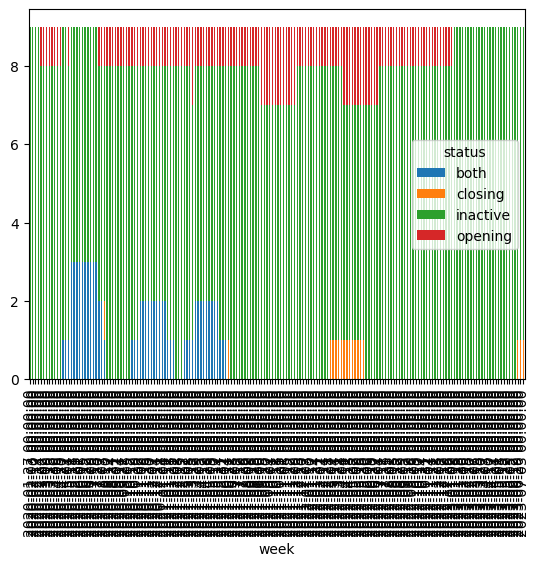

In [173]:
df.groupby(["week", "status"])["user"].count().unstack().plot.bar(stacked=True)
plt.show()

In [ ]:
plt.